<a href="https://colab.research.google.com/github/1kalyan/DataWarehouseDataMining/blob/main/LAB3/LAB_3_ALL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Question 1**

In [1]:
import pandas as pd
import math

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/DataWarehouseDataMining/laptop_buy_data.csv')

# Helper function to calculate entropy
def entropy(data):
    label_col = data.iloc[:, -1]
    labels = label_col.unique()
    entropy_value = 0
    for label in labels:
        prob = (label_col == label).mean()
        entropy_value -= prob * math.log2(prob)
    return entropy_value

# Function to calculate Information Gain
def info_gain(data, split_attribute):
    total_entropy = entropy(data)
    values = data[split_attribute].unique()
    weighted_entropy = 0
    for value in values:
        subset = data[data[split_attribute] == value]
        weighted_entropy += (len(subset)/len(data)) * entropy(subset)
    gain = total_entropy - weighted_entropy
    return gain

# ID3 recursive function
def id3(data, features):
    target = data.columns[-1]
    # If all target labels are the same, return the label
    if len(data[target].unique()) == 1:
        return data[target].iloc[0]

    # If no more features, return majority class
    if len(features) == 0:
        return data[target].mode()[0]

    # Choose best feature based on info gain
    gains = [info_gain(data, feature) for feature in features]
    best_feature = features[gains.index(max(gains))]
    tree = {best_feature: {}}

    for value in data[best_feature].unique():
        sub_data = data[data[best_feature] == value]
        sub_tree = id3(sub_data, [f for f in features if f != best_feature])
        tree[best_feature][value] = sub_tree
    return tree

# Build the tree
features = list(df.columns[:-1])
tree = id3(df, features)
print("Decision Tree (ID3):")
print(tree)


Decision Tree (ID3):
{'Age': {'Youth': {'Student': {'Yes': 'Buy', 'No': {'Credit_Rating': {'Excellent': 'No', 'Fair': 'Buy'}}}}, 'Middle_Aged': {'Income': {'Low': {'Credit_Rating': {'Excellent': 'No', 'Fair': {'Student': {'Yes': 'Buy'}}}}, 'Medium': 'No', 'High': 'No'}}, 'Senior': {'Credit_Rating': {'Fair': 'No', 'Excellent': {'Income': {'Low': 'Buy', 'High': {'Student': {'No': 'Buy'}}, 'Medium': 'Buy'}}}}}}


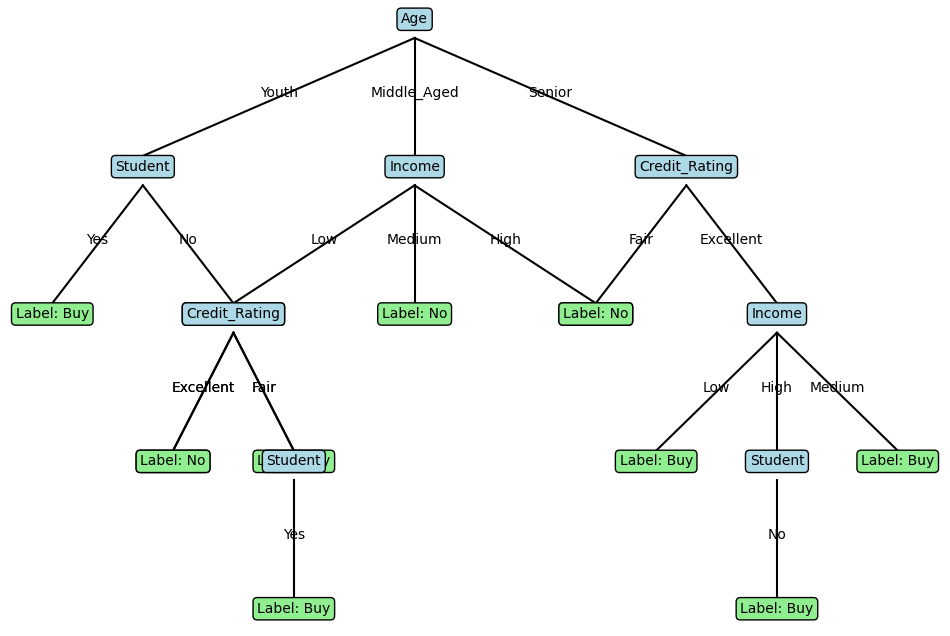

In [4]:
import matplotlib.pyplot as plt

def plot_tree(tree, parent_name='', x=0.5, y=1.0, dx=0.1, dy=0.1, ax=None, level=1):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 8))
        ax.axis('off')

    if isinstance(tree, dict):
        root = list(tree.keys())[0]
        children = tree[root]
        ax.text(x, y, root, ha='center', bbox=dict(boxstyle="round", facecolor="lightblue"))

        # Split horizontal space between children
        num_children = len(children)
        child_xs = [x + dx * (i - (num_children - 1) / 2) for i in range(num_children)]

        for child_x, (value, subtree) in zip(child_xs, children.items()):
            # Draw edge label
            ax.text((x + child_x) / 2, y - dy / 2, str(value), ha='center')
            # Draw line
            ax.plot([x, child_x], [y - 0.01, y - dy + 0.01], 'k-')
            # Recursive plot
            plot_tree(subtree, root, child_x, y - dy, dx / 1.5, dy, ax=ax, level=level + 1)
    else:
        ax.text(x, y, f"Label: {tree}", ha='center', bbox=dict(boxstyle="round", facecolor="lightgreen"))

    if parent_name == '':
        plt.show()

plot_tree(tree)

# **Question 2**

In [2]:
import pandas as pd

# Load the data
df = pd.read_csv('/content/drive/MyDrive/DataWarehouseDataMining/laptop_buy_data.csv')

# Convert categorical values to numbers
df_encoded = df.copy()
for column in df.columns:
    df_encoded[column] = df[column].astype('category').cat.codes

# Separate features and target
X = df_encoded.iloc[:, :-1]
y = df_encoded.iloc[:, -1]

# Split into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Naive Bayes from sklearn
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

# Predict and check accuracy
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.3333333333333333


# **Question 3**

In [3]:
import numpy as np

# Input data (4 samples, 2 features each)
X = np.array([
    [-1, -1],
    [-1, 1],
    [1, -1],
    [1, 1]
])

# Target output (labels)
y = np.array([
    [-1],
    [1],
    [1],
    [-1]
])

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)  # derivative of sigmoid

# Normalize target to 0 or 1 (sigmoid works in 0-1)
y = (y + 1) / 2  # now -1 => 0, +1 => 1

# Initialize weights randomly
np.random.seed(1)
input_layer_neurons = 2
hidden_layer_neurons = 2
output_neurons = 1

# Weights
wh = 2 * np.random.random((input_layer_neurons, hidden_layer_neurons)) - 1
bh = np.zeros((1, hidden_layer_neurons))

wo = 2 * np.random.random((hidden_layer_neurons, output_neurons)) - 1
bo = np.zeros((1, output_neurons))

# Learning rate
lr = 0.1

# Training loop
for epoch in range(10000):
    # Forward pass
    zh = np.dot(X, wh) + bh
    ah = sigmoid(zh)

    zo = np.dot(ah, wo) + bo
    ao = sigmoid(zo)

    # Compute error
    error = y - ao
    if epoch % 1000 == 0:
        print(f"Epoch {epoch} Error: {np.mean(np.abs(error))}")

    # Backpropagation
    d_output = error * sigmoid_derivative(ao)
    error_hidden = d_output.dot(wo.T)
    d_hidden = error_hidden * sigmoid_derivative(ah)

    # Update weights
    wo += ah.T.dot(d_output) * lr
    bo += np.sum(d_output, axis=0, keepdims=True) * lr
    wh += X.T.dot(d_hidden) * lr
    bh += np.sum(d_hidden, axis=0, keepdims=True) * lr

# Convert output back to -1 or 1
final_output = np.where(ao > 0.5, 1, -1)
print("Predicted Output after training:\n", final_output)


Epoch 0 Error: 0.49885183066270666
Epoch 1000 Error: 0.49800103082525693
Epoch 2000 Error: 0.428095321757062
Epoch 3000 Error: 0.24981704910738842
Epoch 4000 Error: 0.11547292863902894
Epoch 5000 Error: 0.08312127651220597
Epoch 6000 Error: 0.06769305359929269
Epoch 7000 Error: 0.058335198249613716
Epoch 8000 Error: 0.05192321682458555
Epoch 9000 Error: 0.047192045810484536
Predicted Output after training:
 [[-1]
 [ 1]
 [ 1]
 [-1]]
